In [2]:
import sys
sys.path.append("../library/")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from defaultPlot import *
from stringFormat import *
import read_data
import dataProcess

In [2]:
real_confirmed = read_data.real_confirmed()
real_time = np.arange(0, len(real_confirmed), 1)

In [4]:
fig4_data = read_data.fig4()
fig4_new_infected = (fig4_data["S"] + fig4_data["QS"])[:-1] - (fig4_data["S"] + fig4_data["QS"])[1:]
fig4_infectious = (fig4_data["A"] + fig4_data["I"])[:-1]
fig4_t = fig4_data["t"][:-1][fig4_infectious != 0]
fig4_reproduction = fig4_new_infected[fig4_infectious != 0] / fig4_infectious[fig4_infectious != 0]

In [5]:
simulated = read_data.KM("ER,N2.0e+04,M10/SE0.11,EAI0.38,pA0.36,IQI0.33,AR0.10,QICR0.08,XQX0.09,T13.99-9384.txt")
time = np.arange(0, len(simulated["S"]), 1)
new_infected = (simulated["S"] + simulated["QS"])[:-1] - (simulated["S"] + simulated["QS"])[1:]
infectious = (simulated["A"] + simulated["I"])[:-1]
simulation_time = time[:-1][infectious != 0]
reproduction = new_infected[infectious != 0] / infectious[infectious != 0]

confirmed = simulated["QA"] + simulated["QI"] + simulated["CR"]

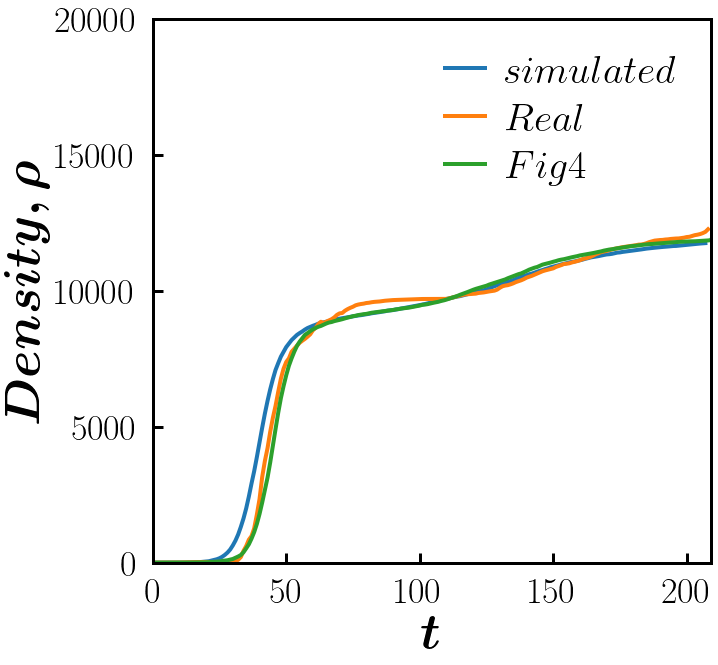

In [9]:
fig, ax = plt.subplots()

ax.plot(time, confirmed, label=latex_string("simulated"))
ax.plot(real_time, real_confirmed, label=latex_string("Real"))
ax.plot(fig4_data["t"], (fig4_data["QA"] + fig4_data["QI"] + fig4_data["CR"]), label=latex_string("Fig4"))


ax.set_xlim(left=0, right=209)
ax.set_ylim(bottom=0, top=20000)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("Density, \\rho"))
ax.legend(loc="upper right")
fig.show()


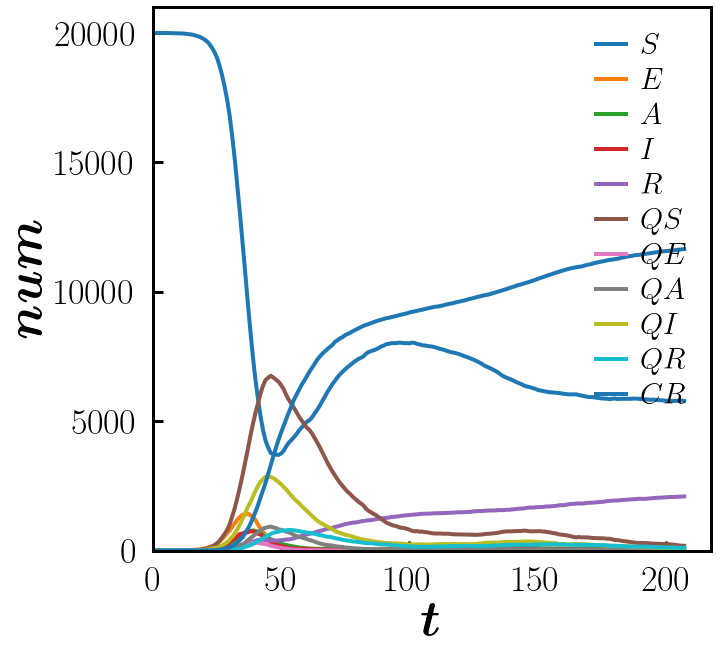

In [10]:
fig, ax = plt.subplots()

ax.plot(time, simulated["S"], label=latex_string("S"))
ax.plot(time, simulated["E"], label=latex_string("E"))
ax.plot(time, simulated["A"], label=latex_string("A"))
ax.plot(time, simulated["I"], label=latex_string("I"))
ax.plot(time, simulated["R"], label=latex_string("R"))
ax.plot(time, simulated["QS"], label=latex_string("QS"))
ax.plot(time, simulated["QE"], label=latex_string("QE"))
ax.plot(time, simulated["QA"], label=latex_string("QA"))
ax.plot(time, simulated["QI"], label=latex_string("QI"))
ax.plot(time, simulated["QR"], label=latex_string("QR"))
ax.plot(time, simulated["CR"], label=latex_string("CR"))

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("num"))
ax.legend(loc="upper right", fontsize=30)
fig.show()

# Reproduction Number

In [14]:
data = read_data.KM_Rt("ER,N8.0e+04,M10/SE0.11,EAI0.39,pA0.36,IQI0.33,AR0.11,QICR0.08,XQX0.09,T14.00-0.txt")
real_confirmed = read_data.real_confirmed()
real_time = np.arange(0, len(real_confirmed), 1)
real_t, real_Rt = read_data.real_Rt()
real_t -= 12
t = np.arange(0, len(data["R"]), 1)
Rt = data["Rt"]
Rt_estimated = 2.0*data["L"]/8e4 * 0.11 / 0.36

new_infected = (data["S"] + data["QS"])[:-1] - (data["S"] + data["QS"])[1:]
infectious = (data["A"] + data["I"])[:-1]
Rt_naive = new_infected[infectious != 0] / infectious[infectious != 0]
t_naive = t[:-1][infectious != 0]



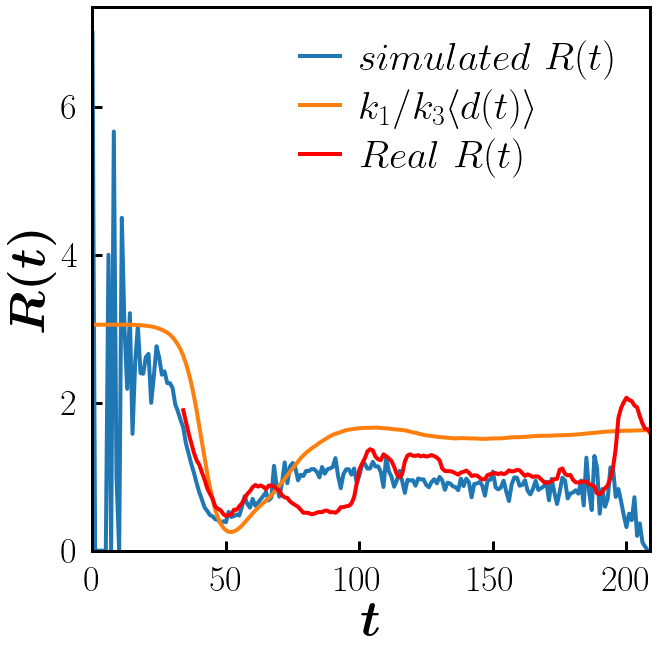

In [15]:
fig, ax = plt.subplots()

ax.plot(t, Rt, label=latex_string("simulated\ R(t)"))
ax.plot(t, Rt_estimated, label=latex_string("k_1/k_3 \langle d(t)\\rangle"))
# ax.plot(t_naive, Rt_naive, label=latex_string("naive\ R(t)"))
ax.plot(real_t, real_Rt, label=latex_string("Real\ R(t)"), color='r')

ax.set_xlim(left=0, right=209)
ax.set_ylim(bottom=0)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("R(t)"))
ax.legend(loc="best")
fig.show()


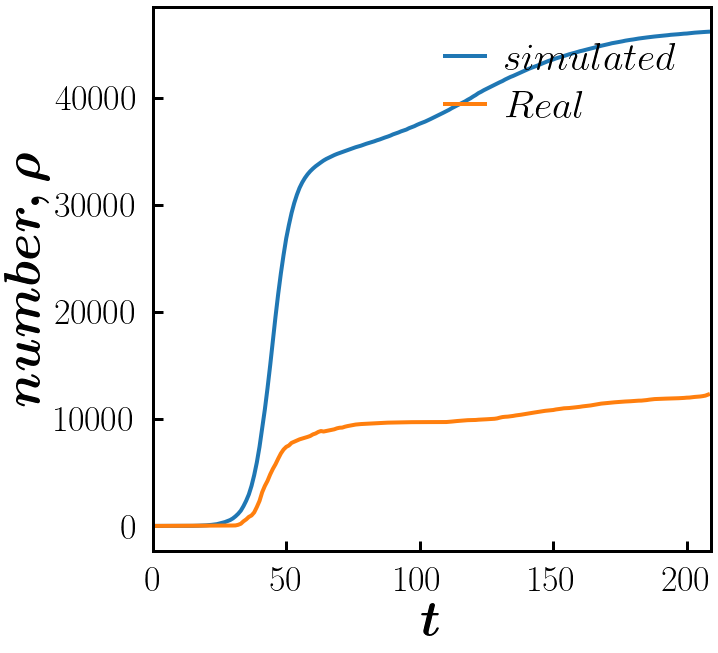

In [16]:
fig, ax = plt.subplots()

ax.plot(t, data["QA"] + data["QI"] + data["CR"], label=latex_string("simulated"))
ax.plot(real_time, real_confirmed, label=latex_string("Real"))

ax.set_xlim(left=0, right=209)
# ax.set_ylim(bottom=0, top=20000)
ax.set_xlabel(latex_bold_string("t"))
ax.set_ylabel(latex_bold_string("number, \\rho"))
ax.legend(loc="upper right")
fig.show()
